# **0 - HELPERS**

## 0.1 - Libraries

*Import required libraries*

In [2]:
# don't cache libraries (especially project library)
%load_ext autoreload
%autoreload 2

In [3]:
# setup and environment
import warnings
import os
from   pathlib import Path

# data manipulation
#import re
import numpy as np
import pandas as pd

# images
#from PIL import Image

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# notebooks
from IPython.display import display, HTML

from scipy.stats import shapiro, levene, mannwhitneyu
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.discrete.discrete_model import Logit
from statsmodels.discrete.discrete_model import MNLogit

# causal inference
#import statsmodels.formula.api as smf

# machine learning
from sklearn.model_selection        import train_test_split
from sklearn.linear_model           import LogisticRegression
from sklearn.linear_model           import LogisticRegressionCV
from sklearn.metrics                import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# model tracking
#import mlflow

## 0.2 - Setup

*Define basic configurations*

In [4]:
#####################
# pandas dataframes #
#####################

# set cientific notation for pandas
pd.set_option(
    "display.float_format", "{:,.3f}".format
)  # used in some places like SeriesFormatter
pd.set_option(
    "display.precision", 3
)  # for regular formatting as well as scientific notation
pd.set_option(
    "styler.format.precision", 3
)  # The precision for floats and complex numbers
# don't truncate columns
pd.set_option("display.max_colwidth", 100)  # None for unlimited
# display all columns
pd.set_option("display.max_columns", None)
# display up to 100 rows
pd.set_option("display.max_rows", 100)
# display dimensions
pd.set_option("display.show_dimensions", True)
# define decimals and thousand separation
pd.set_option("styler.format.decimal", ",")
pd.set_option("styler.format.thousands", ".")

####################
# matplotlib plots #
####################

# set default plt figure size
plt.rcParams["figure.figsize"] = [10, 5]
# figure suptitle
plt.rcParams["figure.titlesize"] = "large"
plt.rcParams["figure.titleweight"] = "bold"
# set default plt font size
plt.rcParams["font.size"] = 24
# font weight
# plt.rcParams["font.weight"] = "bold"
# title location
plt.rcParams["axes.titlelocation"] = "left"
# title size
plt.rcParams["axes.titlesize"] = "large"
# title wight
plt.rcParams["axes.titleweight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# spines
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# axis labels
plt.rcParams["xaxis.labellocation"] = "left"
plt.rcParams["yaxis.labellocation"] = "top"
# figure layout
plt.rcParams["figure.autolayout"] = False
# save figures
plt.rcParams["savefig.dpi"] = 900
plt.rcParams["savefig.facecolor"] = "white"
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.format"] = "png"

# set fivethirtyeight pallete
plt.style.use("fivethirtyeight")

#####################
# jupyter notebooks #
#####################

# set cell size to be expanded
display(HTML("<style>.container { width:100% !important; }</style>"))

## 0.3 - Functions

*Define functions that will be used on the notebook*

## 0.4 - Constants

*Define reusuable constants*

In [5]:
# define the project root path that will be the "baseline" for all paths in the notebook
PROJECT_ROOT_PATH = Path.cwd()
PROJECT_ROOT_PATH

PosixPath('/Users/whanerendo/Documents/Whaner/Omdena/ankara-turkey-student-success/src/tasks/task-3-model buiding/ml-team-3')

In [6]:
# define war data folder path
RAW_DATA_PATH = os.path.join(PROJECT_ROOT_PATH)

# inspect folder
os.listdir(RAW_DATA_PATH)

['clustering_team2.ipynb',
 'Clustering_and_Classification.ipynb',
 'modeling_whaner.ipynb',
 'turkiye-student-evaluation_generic.csv']

In [7]:
# define a default MLFlow experiment name
ML_FLOW_TS_EXPERIMENT = "ts_experiments"

# **1 - DATA EXTRACTION**

## 1.1 - Entity Relationship Diagram

*Display Entity-Relationship Diagram to a better data understanding*

## 1.2 - Data Fields Description / Infos

### source: http://archive.ics.uci.edu/dataset/262/turkiye+student+evaluation

## 1.3 - Data Loading

*Load data from required files*

In [8]:
# define file to load data
FILE = os.path.join(RAW_DATA_PATH, "turkiye-student-evaluation_generic.csv")

# read data from csv
df_extraction = pd.read_csv(
    filepath_or_buffer=FILE
    )

# inspect loaded dataset
display(
    df_extraction.dtypes,
    df_extraction
    )

instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
Length: 33, dtype: object

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# **2 - DATA DESCRIPTION**

## 2.1 - Restore Point

In [9]:
# create a restore point of the previous section
df_description = df_extraction.copy()

## 2.2 - Dataset's Schema

#### **Features - Schema**

* instr: Instructor's identifier; values taken from {1,2,3}
* class: Course code (descriptor); values taken from {1-13}
* repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}
* attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}
* difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}
* Q1:  The semester course content, teaching method and evaluation system were provided at the start.
* Q2:  The course aims and objectives were clearly stated at the beginning of the period.
* Q3:  The course was worth the amount of credit assigned to it.
* Q4:  The course was taught according to the syllabus announced on the first day of class.
* Q5:	The class discussions, homework assignments, applications and studies were satisfactory.
* Q6:  The textbook and other courses resources were sufficient and up to date.
* Q7:  The course allowed field work, applications, laboratory, discussion and other studies.
* Q8:  The quizzes, assignments, projects and exams contributed to helping the learning.
* Q9:  I greatly enjoyed the class and was eager to actively participate during the lectures.
* Q10: My initial expectations about the course were met at the end of the period or year.
* Q11: The course was relevant and beneficial to my professional development.
* Q12: The course helped me look at life and the world with a new perspective.
* Q13: The Instructor's knowledge was relevant and up to date.
* Q14: The Instructor came prepared for classes.
* Q15: The Instructor taught in accordance with the announced lesson plan.
* Q16: The Instructor was committed to the course and was understandable.
* Q17: The Instructor arrived on time for classes.
* Q18: The Instructor has a smooth and easy to follow delivery/speech.
* Q19: The Instructor made effective use of class hours.
* Q20: The Instructor explained the course and was eager to be helpful to students.
* Q21: The Instructor demonstrated a positive approach to students.
* Q22: The Instructor was open and respectful of the views of students about the course.
* Q23: The Instructor encouraged participation in the course.
* Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.
* Q25: The Instructor responded to questions about the course inside and outside of the course.
* Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.
* Q27: The Instructor provided solutions to exams and discussed them with students.
* Q28: The Instructor treated all students in a right and objective manner.

*Q1-Q28 are all Likert-type, meaning that the values are taken from: 1- Strong Disagree, 2- Disagree, 3- Neutral, 4- Agree, 5- Strongly Agree*



## 2.3 - Rename Columns

*Search for misleading or error-prone column names*

In [10]:
# check column names
df_description.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

## 2.4 - Check Data Dimensions

*Check dataframe dimensions to know if pandas will be enough to handle such data size or we will need Big Data tools like Spark*

In [11]:
# check number of rows and columns
print( f'\
Dataframe has {df_description.shape[0]:,} \
rows and {df_description.shape[1]} columns' )

Dataframe has 5,820 rows and 33 columns


## 2.5 - Data Types

*Check if data types on dataframe makes sense according to database information*

In [12]:
# inspect dataframe types
display(
    df_description.dtypes,
    df_description.head(3)
    )

instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
Length: 33, dtype: object

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


### Beside nb.repeat, the other features should be categorical

In [13]:
# Change column type to category for columns: 'instr', 'class' and 30 other columns
df_description = df_description.astype({'instr': 'category', 'class': 'category', 'attendance': 'category',
                                        'difficulty': 'category', 'Q1': 'category', 'Q2': 'category', 'Q3': 'category',
                                        'Q4': 'category', 'Q5': 'category', 'Q6': 'category', 'Q7': 'category',
                                        'Q8': 'category', 'Q9': 'category', 'Q10': 'category', 'Q11': 'category',
                                        'Q12': 'category', 'Q13': 'category', 'Q14': 'category', 'Q15': 'category',
                                        'Q16': 'category', 'Q17': 'category', 'Q18': 'category', 'Q19': 'category',
                                        'Q20': 'category', 'Q21': 'category', 'Q22': 'category', 'Q23': 'category',
                                        'Q24': 'category', 'Q25': 'category', 'Q26': 'category', 'Q27': 'category',
                                        'Q28': 'category'})

In [14]:
# inspect dataframe new types
display(
    df_description.dtypes,
    df_description.head(3)
    )

instr         category
class         category
nb.repeat        int64
attendance    category
difficulty    category
Q1            category
Q2            category
Q3            category
Q4            category
Q5            category
Q6            category
Q7            category
Q8            category
Q9            category
Q10           category
Q11           category
Q12           category
Q13           category
Q14           category
Q15           category
Q16           category
Q17           category
Q18           category
Q19           category
Q20           category
Q21           category
Q22           category
Q23           category
Q24           category
Q25           category
Q26           category
Q27           category
Q28           category
Length: 33, dtype: object

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


## 2.6 - Check Duplicated Rows

In [15]:
print(f'There are {df_description.duplicated().sum()} duplicated rows')

There are 1843 duplicated rows


*Inspect duplicated rows and handle them properly*

In [16]:
# define dataframe granularity
df_grain = ['Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28']

# check duplicated rows
print(
    f'{"*"*49}\n\n'
    f'There are {df_description.duplicated().sum():,} \
duplicated rows [{df_description.duplicated().mean()*100:.2f}%] based on all columns. \
Duplicated rows are double counted.'
    f'\n\n{"*"*49}\n\n'
    f'There are {df_description.duplicated(subset=df_grain).sum():,} duplicated rows [{df_description.duplicated().mean()*100:.2f}%] based on table granularity. \
Duplicated rows are double counted.'
    f'\n\n{"*"*49}'
)

*************************************************

There are 1,843 duplicated rows [31.67%] based on all columns. Duplicated rows are double counted.

*************************************************

There are 3,228 duplicated rows [31.67%] based on table granularity. Duplicated rows are double counted.

*************************************************


*Rows duplicated*

In [17]:
df_description_duplicated = df_description.loc[df_description.duplicated()]
df_description_duplicated

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
24,1,2,1,1,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
27,1,2,1,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
30,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
31,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,3,13,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5811,3,13,1,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5812,3,13,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5815,3,13,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Dataset without the duplated rows

In [18]:
df_description_no_duplicated = df_description.loc[df_description.duplicated()==False]
df_description_no_duplicated

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5814,3,13,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


## 2.7 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [19]:
#  get number of NAs
display(
    "Total of NAs",
    df_description.isna().sum(),
    "Percent of NAs",
    df_description.isna().mean()
)

'Total of NAs'

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
Length: 33, dtype: int64

'Percent of NAs'

instr        0.000
class        0.000
nb.repeat    0.000
attendance   0.000
difficulty   0.000
Q1           0.000
Q2           0.000
Q3           0.000
Q4           0.000
Q5           0.000
Q6           0.000
Q7           0.000
Q8           0.000
Q9           0.000
Q10          0.000
Q11          0.000
Q12          0.000
Q13          0.000
Q14          0.000
Q15          0.000
Q16          0.000
Q17          0.000
Q18          0.000
Q19          0.000
Q20          0.000
Q21          0.000
Q22          0.000
Q23          0.000
Q24          0.000
Q25          0.000
Q26          0.000
Q27          0.000
Q28          0.000
Length: 33, dtype: float64

In [20]:
# inspect rows with NAs
df_description[df_description.isna().any(axis=1)]

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28


## 2.8 - Handle Missing Values

*Handle missing value for columns*

### No NA will be handled for this first iteration

## 2.9 - Descriptive Statistics

*Inspect some summary statistics for numerical columns*

In [21]:
df_description['nb.repeat'].describe()

count   5,820.000
mean        1.214
std         0.532
min         1.000
25%         1.000
50%         1.000
75%         1.000
max         3.000
Name: nb.repeat, Length: 8, dtype: float64

In [22]:
df_description_no_duplicated['nb.repeat'].describe()

count   3,977.000
mean        1.268
std         0.583
min         1.000
25%         1.000
50%         1.000
75%         1.000
max         3.000
Name: nb.repeat, Length: 8, dtype: float64

### Checking if both columns are statisticly equal

In [23]:
col_df1 = df_description['nb.repeat']
col_df2 = df_description_no_duplicated['nb.repeat']

# Normality test (Shapiro-Wilk test)
_, p_value_norm_df1 = shapiro(col_df1)
_, p_value_norm_df2 = shapiro(col_df2)

alpha = 0.05  # Significance level

print(f'Normality - DataFrame 1 - p-value: {p_value_norm_df1}')
print(f'Normality - DataFrame 2 - p-value: {p_value_norm_df2}')

# Homogeneity of variance test (Levene test)
_, p_value_var = levene(col_df1, col_df2)

print(f'Homogeneity of Variance - p-value: {p_value_var}')

# Checking the results of the assumption tests
if p_value_norm_df1 > alpha and p_value_norm_df2 > alpha:
    print("The data seems to follow a normal distribution.")
else:
    print("At least one of the datasets does not follow a normal distribution.")

if p_value_var > alpha:
    print("Homogeneity of variance is satisfied.")
else:
    print("Homogeneity of variance is not satisfied.")

Normality - DataFrame 1 - p-value: 0.0
Normality - DataFrame 2 - p-value: 0.0
Homogeneity of Variance - p-value: 2.4433628907697086e-06
At least one of the datasets does not follow a normal distribution.
Homogeneity of variance is not satisfied.


/Users/whanerendo/anaconda3/envs/omdena/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [24]:
# Performing the Mann-Whitney U test
statistic, p_value_mannwhitney = mannwhitneyu(col_df1, col_df2, alternative='two-sided')

# Checking the results of the Mann-Whitney U test
print(f'Mann-Whitney U statistic: {statistic}')
print(f'P-value: {p_value_mannwhitney}')

if p_value_mannwhitney < alpha:
    print("Reject the null hypothesis: The distributions are statistically different.")
else:
    print("Cannot reject the null hypothesis: The distributions are not statistically different.")


Mann-Whitney U statistic: 11117913.0
P-value: 4.6937322720790353e-07
Reject the null hypothesis: The distributions are statistically different.


### The Mann-Whitney U test rejected the null hypothesis indicating that we have found a significant difference between the two columns.

### On modeling we could try with and without the duplicated rows to assess the results

# **3 - FEATURE ENGINEERING**

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [25]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()
df_f_eng_nd = df_description_no_duplicated.copy() # index nd = Non Duplicated

# display
display(df_f_eng)
display(df_f_eng_nd)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5814,3,13,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


## 3.2 - Hypothesis Testing List

*Define the list of hypotheses that will be validated during Exploratory Data Analysis (EDA)*

H1. **...**

H2. **...**

H3. **...**

H4. **...**

H5. **...**

## 3.3 - Feature Creation

*Create new feature (column), categorizing Q10 - {1,2,3} = 0 annd {4,5} = 1*

In [26]:
def transformation(value):
    if value >= (3):
        return 0 
    else:
        return 1

In [27]:

df_q10 = df_f_eng_nd.loc[:, df_f_eng_nd.columns == 'Q10'].copy()
df_q10 = df_q10[df_q10.columns].applymap(lambda x: transformation(x))
df_f_eng_nd['Q10_target'] = df_q10

In [28]:
df_f_eng_nd = df_f_eng_nd.astype({'Q10_target': 'category'})

In [29]:
df_f_eng_nd.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q10_target
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0


# **4 - DATA FILTERING**

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [30]:
# create a restore point for the previous section dataframe
df_filter = df_f_eng_nd.copy()

# check dataframe
df_filter

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q10_target
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
5814,3,13,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,0
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0


## 4.2 Rows Filtering

*Remove rows with meaningless (or unimportant) data*

In [31]:
# No row will be removed for this first iteration

## 4.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment*

In [32]:
# No row will be removed for this first iteration

# **5 - EXPLORATORY DATA ANALYSIS**

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [33]:
# create a restore point for the previous section dataframe
df_eda = df_filter.copy()

# check dataframe
df_eda

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q10_target
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
5814,3,13,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,0
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0


## 5.2 - Univariate Analysis

*Explore variables distributions*

In [34]:
# split dataset into types of features
df_eda_num = df_eda.select_dtypes(include=["number", "bool"])
df_eda_cat = df_eda.select_dtypes(include=["category"])

# sanity check
assert df_eda_num.shape[1] + df_eda_cat.shape[1] == df_eda.shape[1], """Revise the previous split, something may be wrong!"""

### 5.2.1 - Numerical Columns

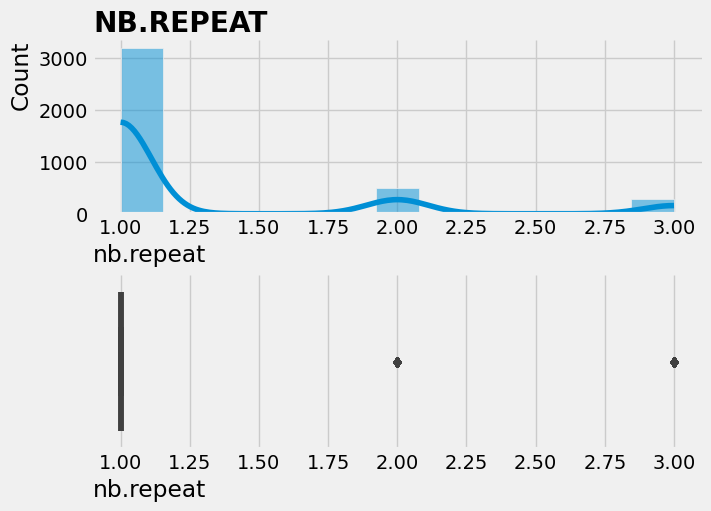

In [35]:
# iterate over numeric columns
for col in df_eda_num.columns.tolist():
    # create a figure object
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), constrained_layout=True)

    # plot histogram and boxplot
    sns.histplot(x=col, data=df_eda_num, kde=True, ax=axs[0])
    sns.boxplot(x=col, data=df_eda_num, ax=axs[1])
    # define plot details
    axs[0].set_title(f"{col.upper()}")
    plt.show()

### 5.2.2 - Categorical Columns

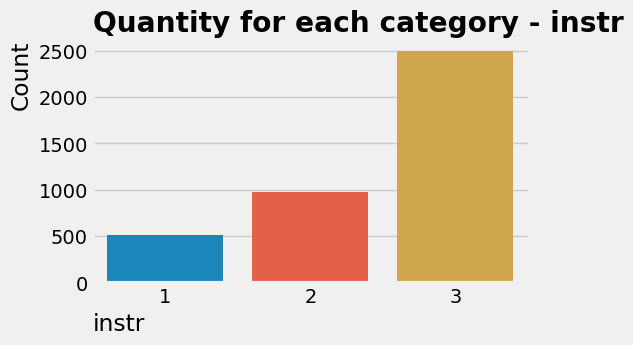

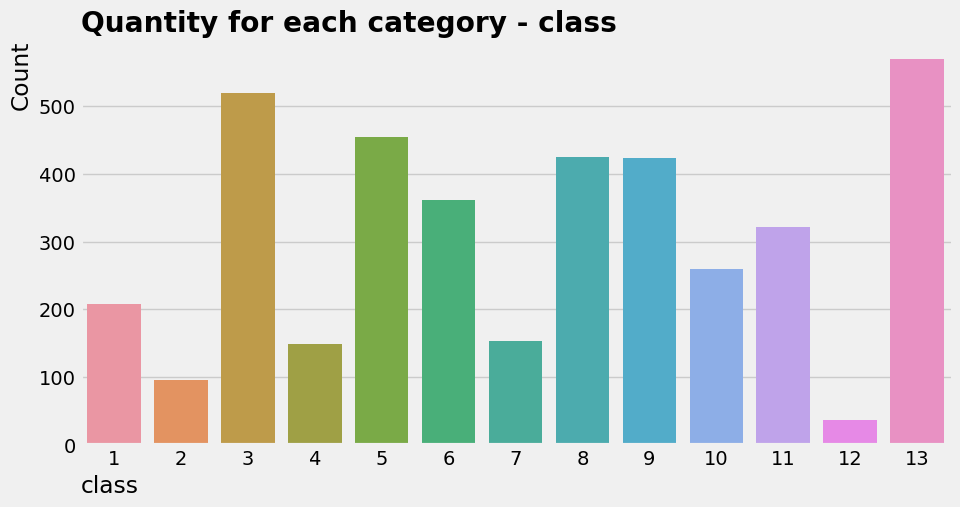

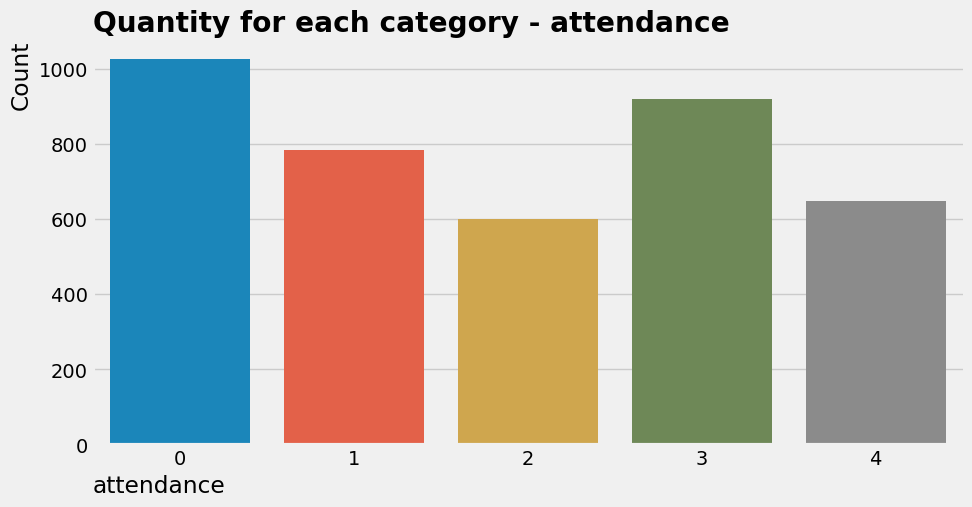

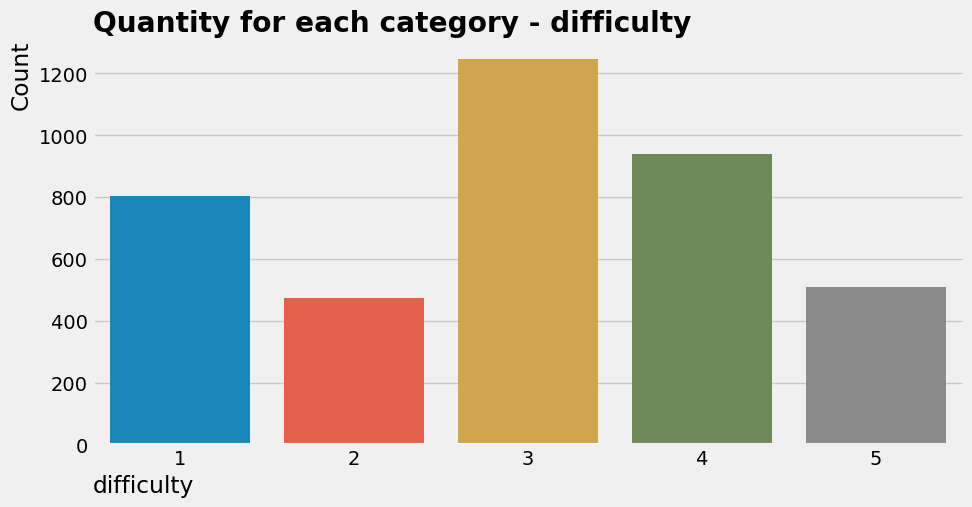

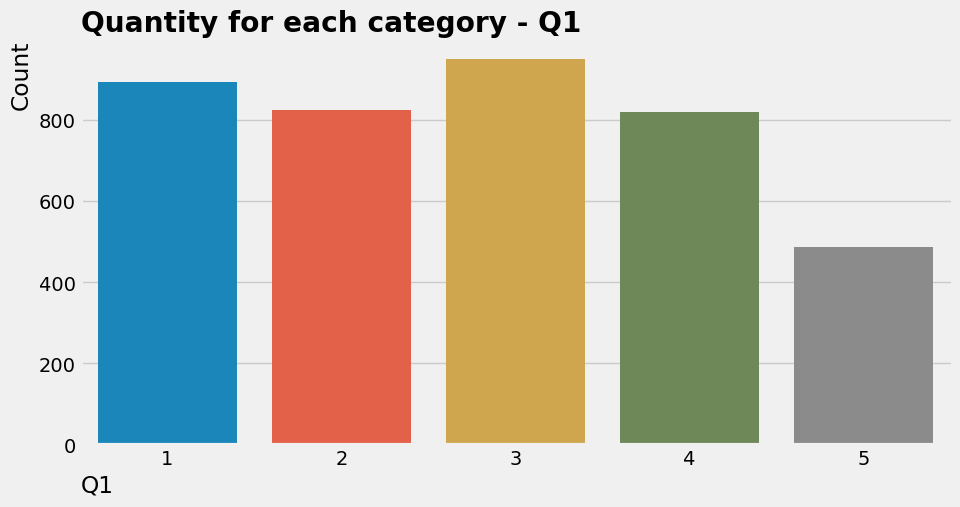

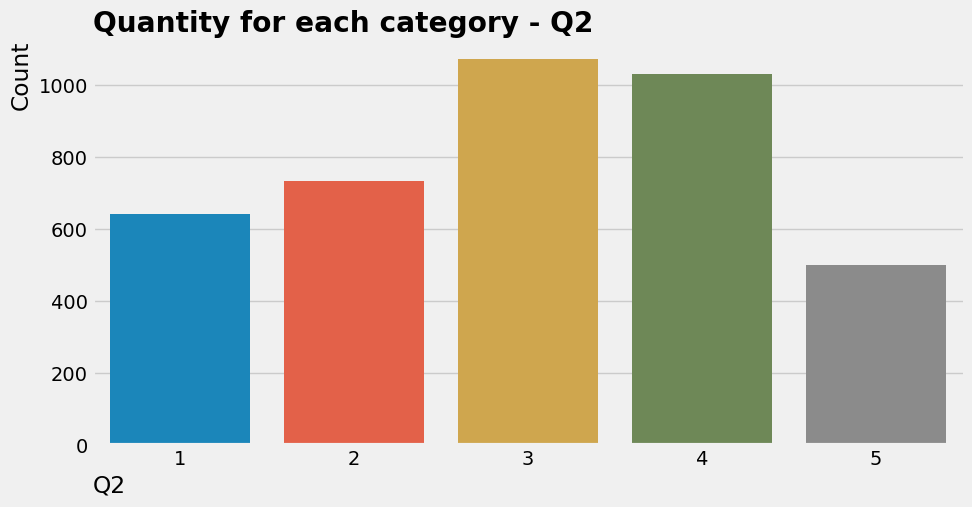

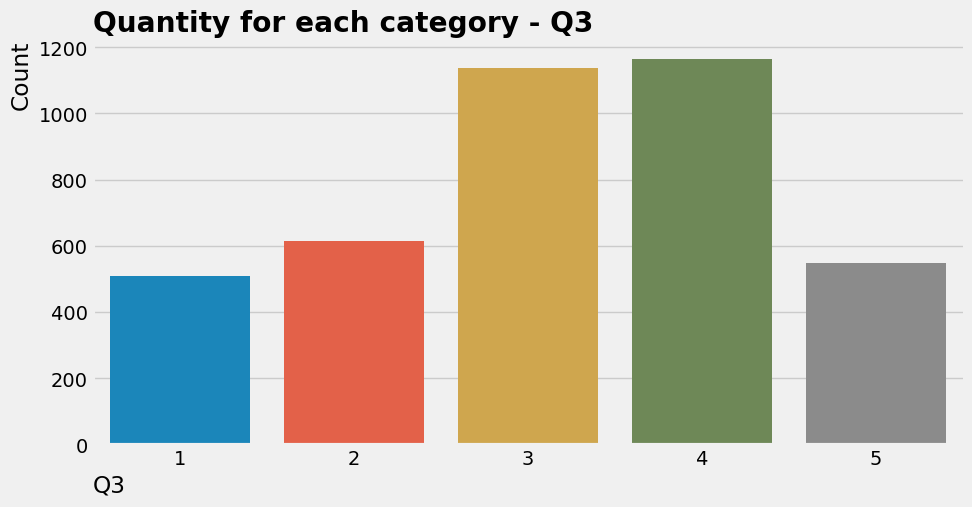

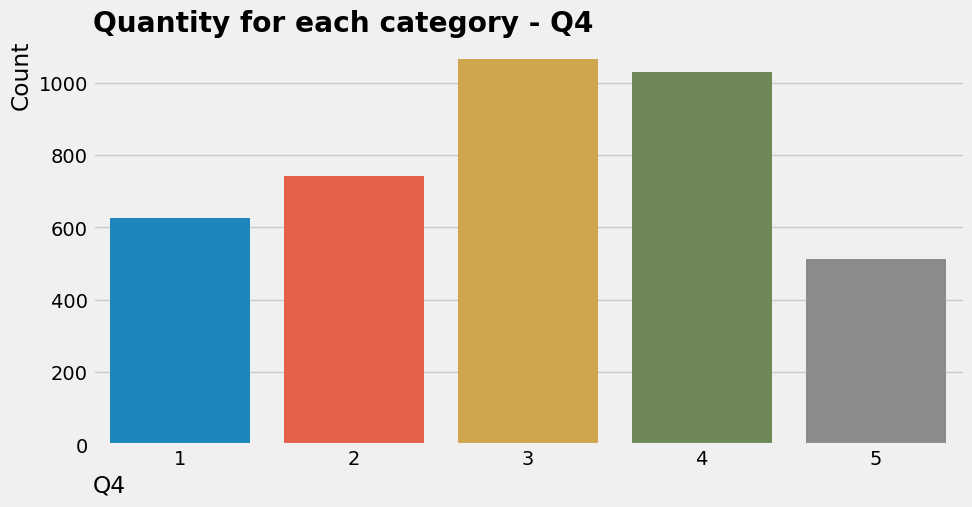

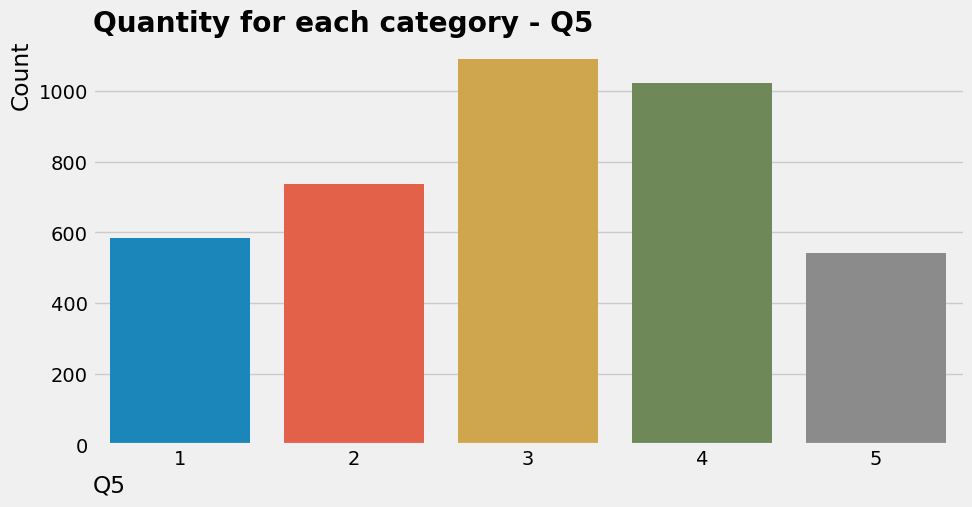

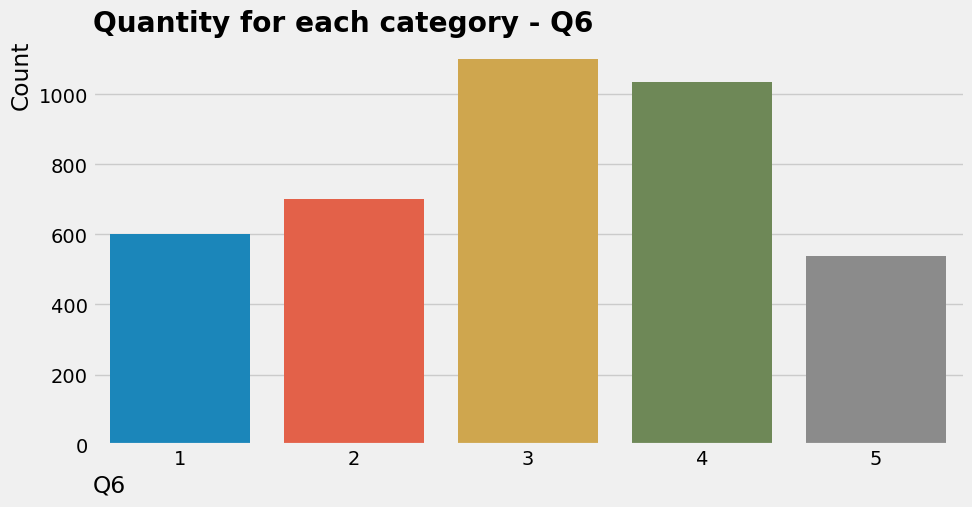

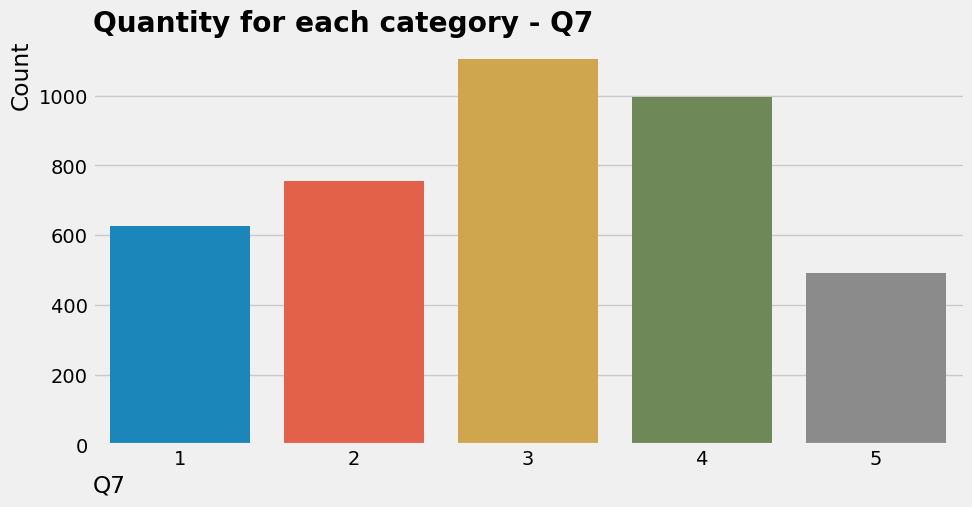

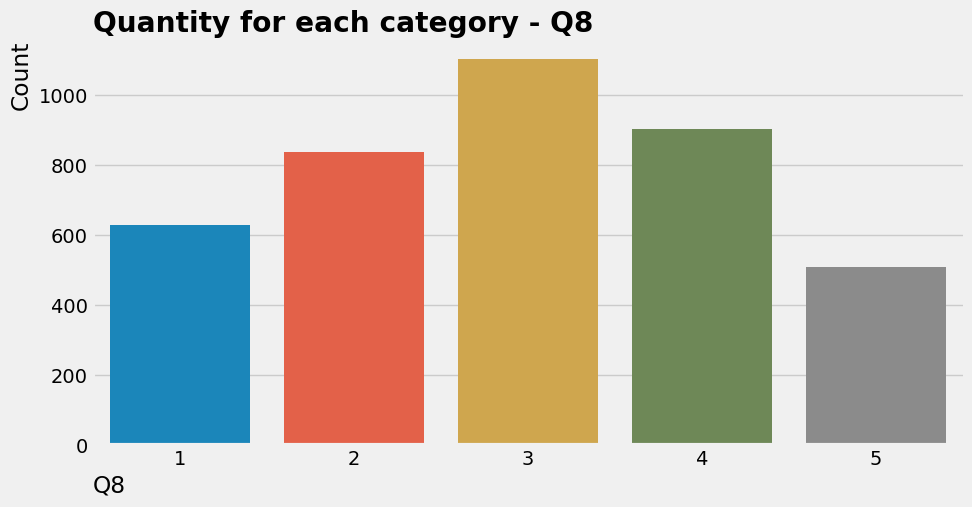

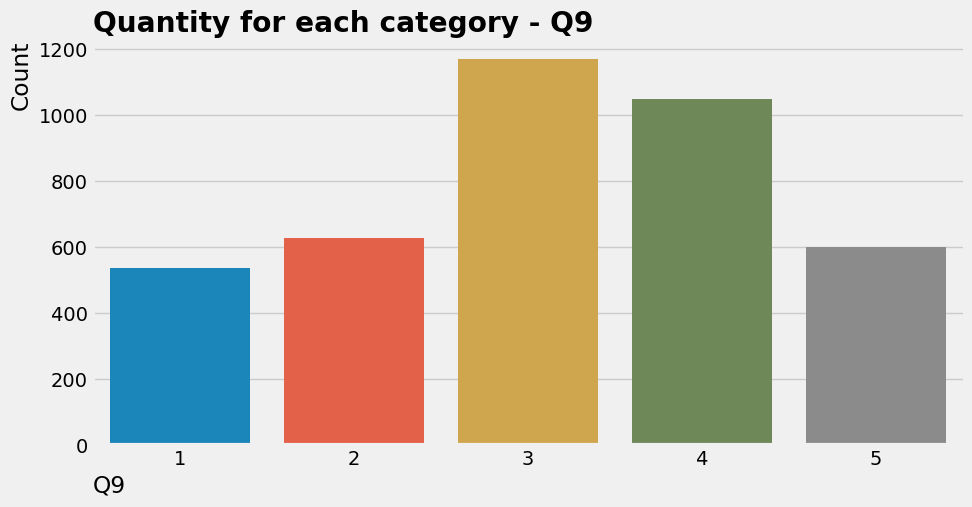

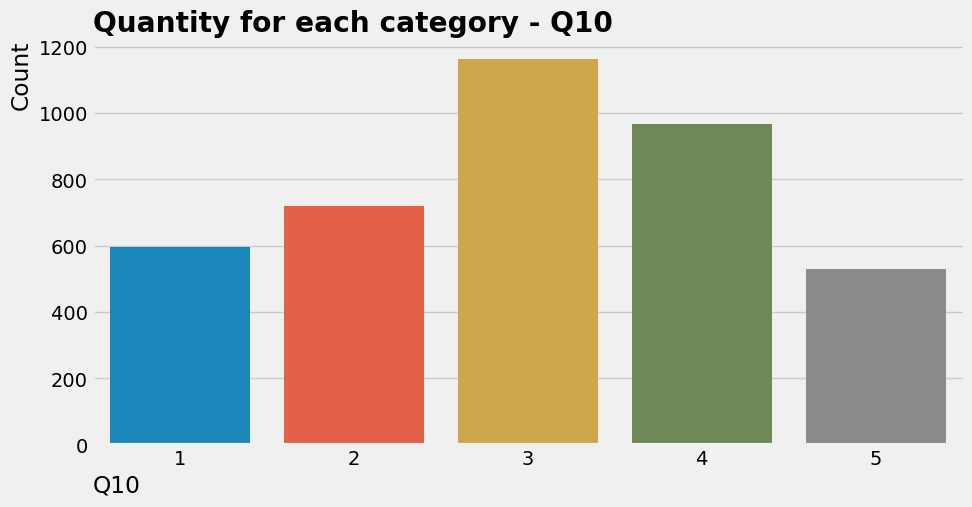

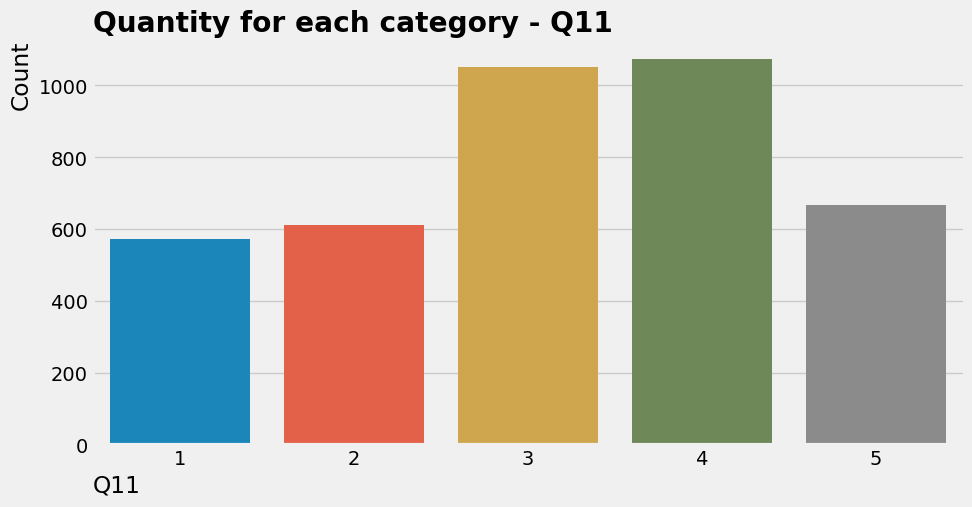

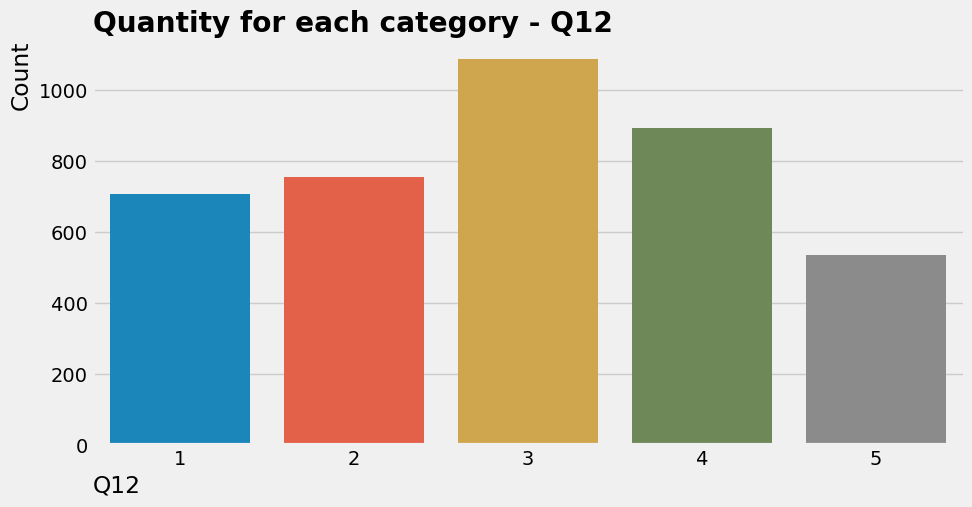

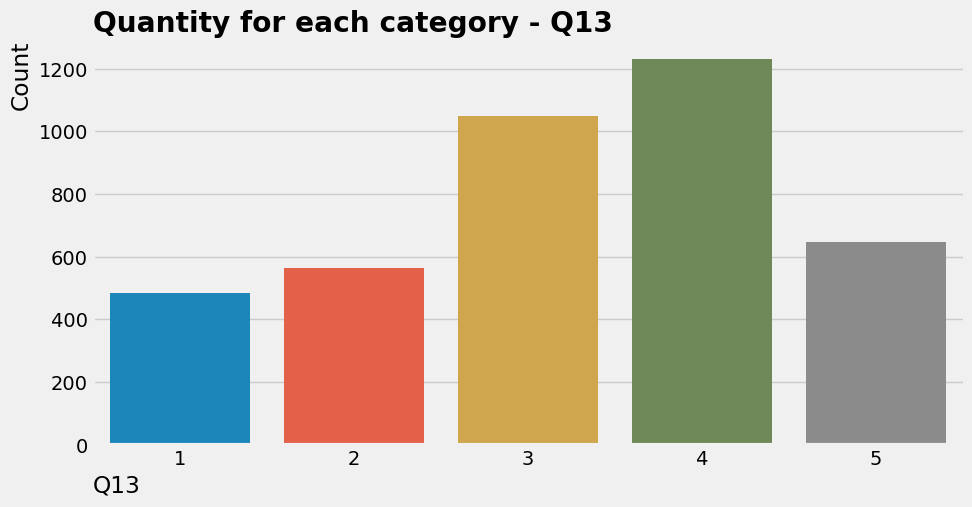

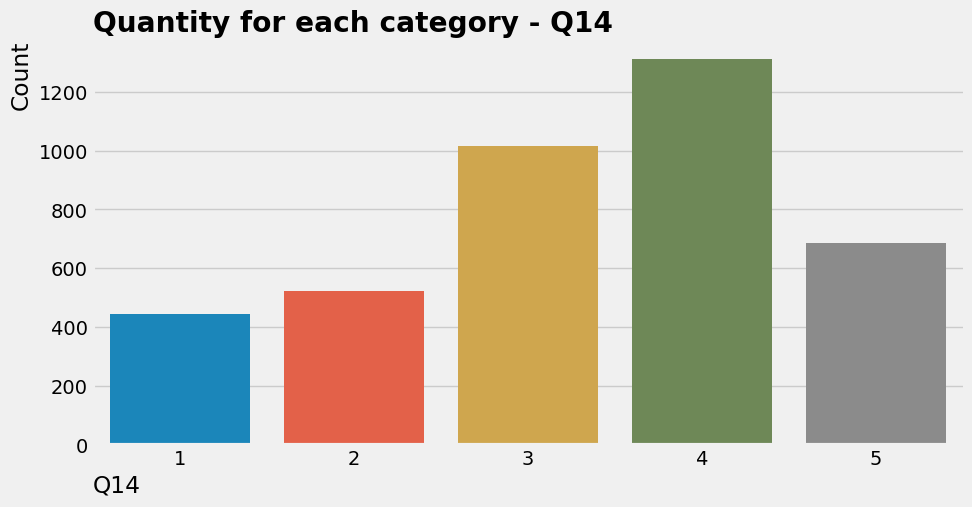

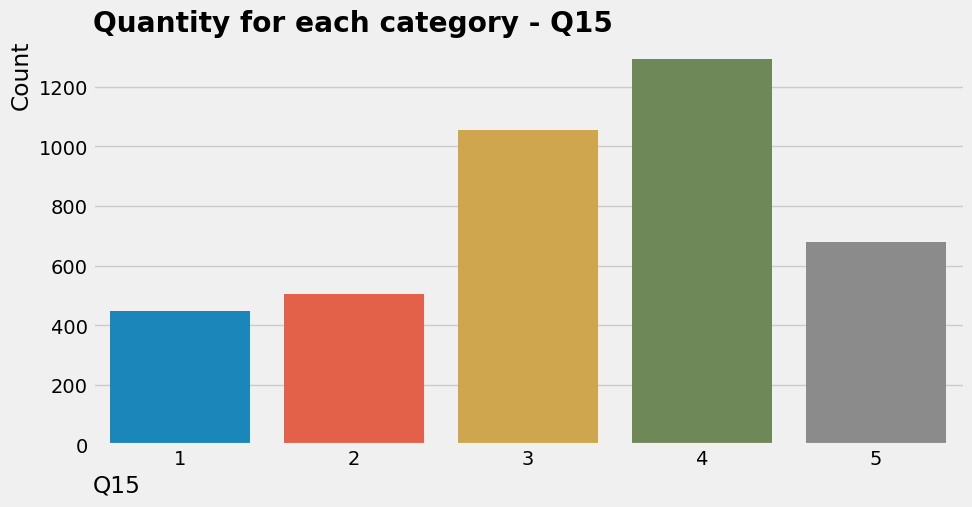

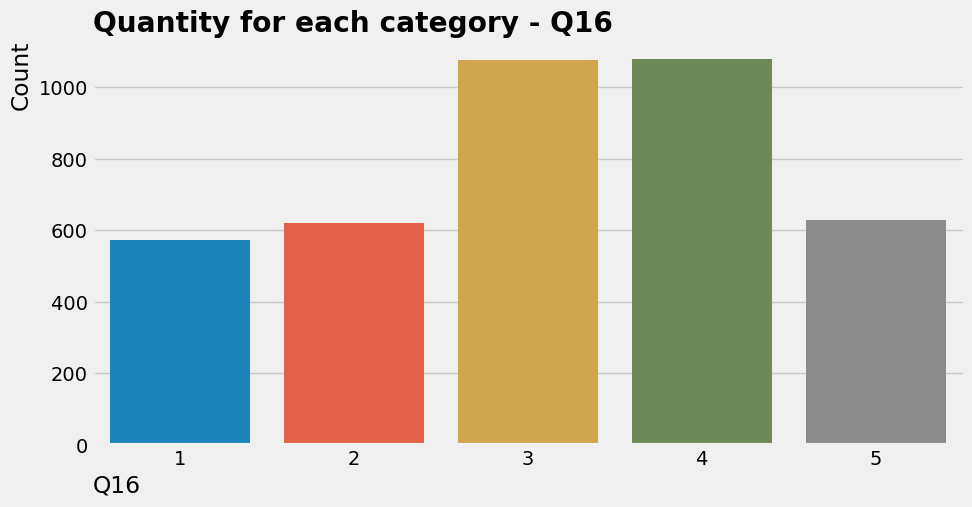

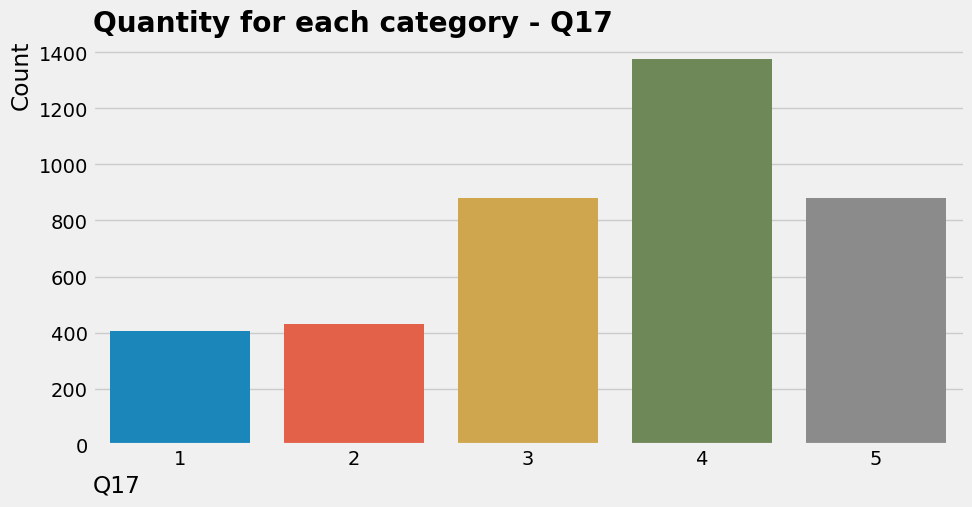

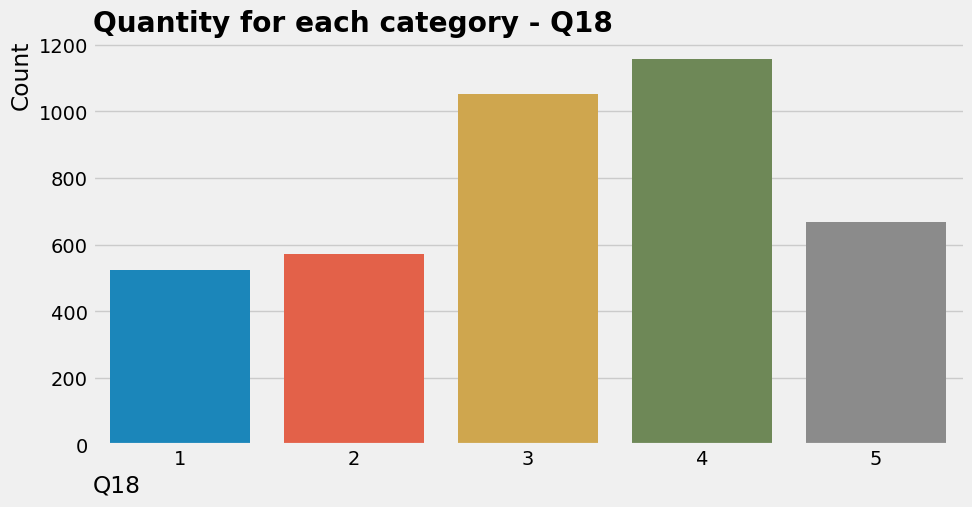

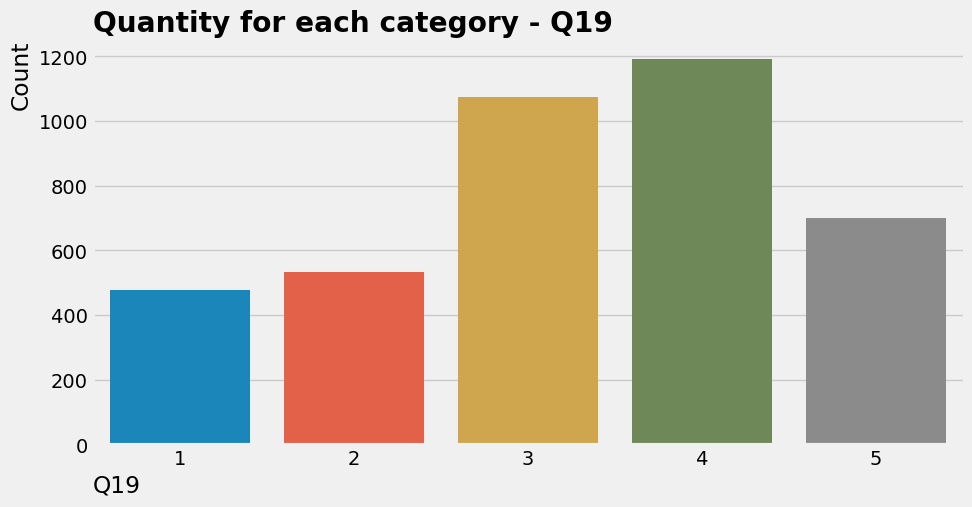

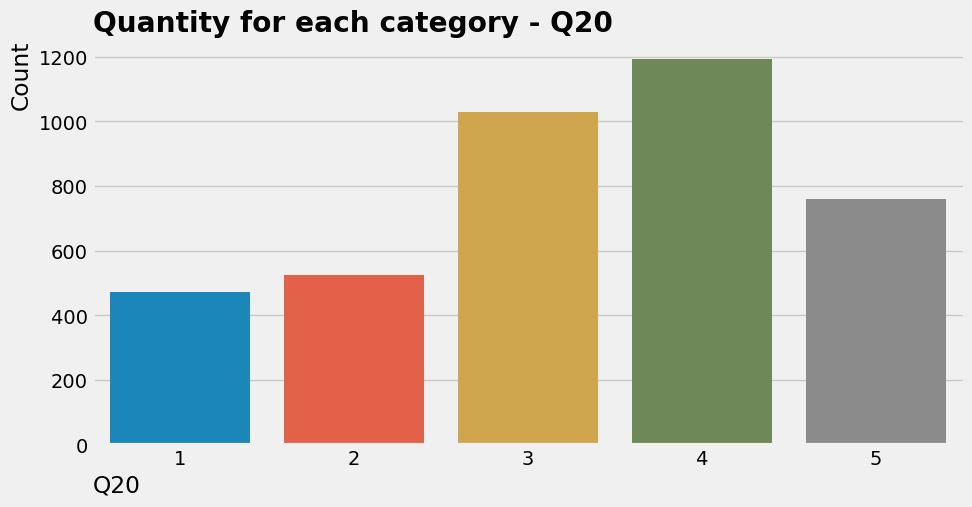

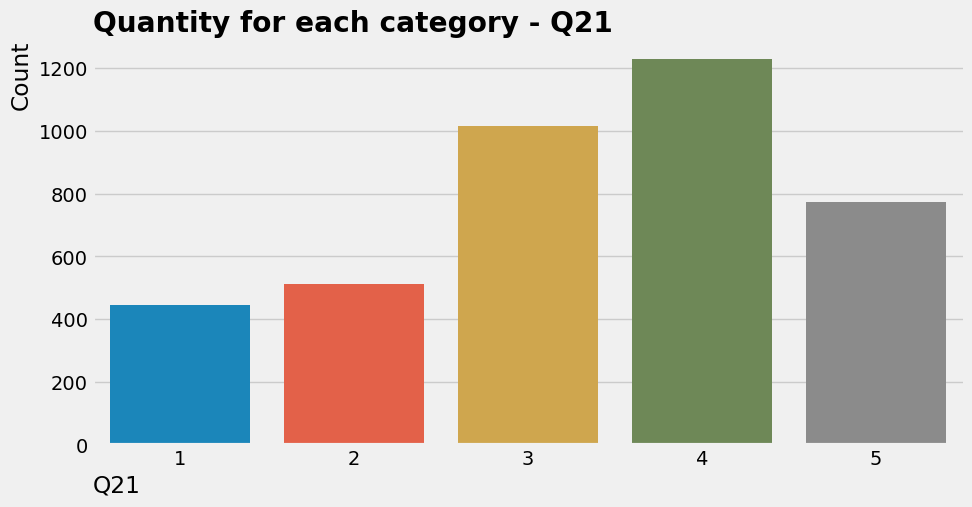

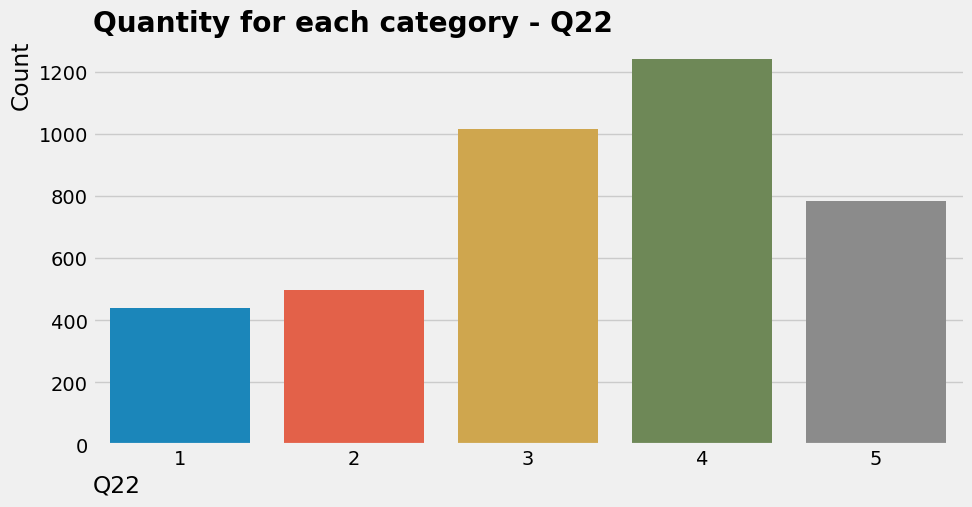

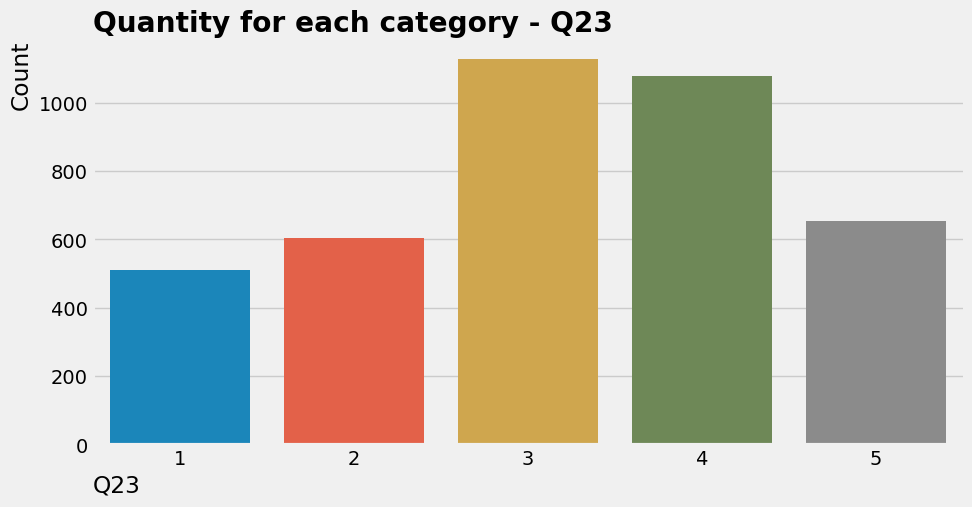

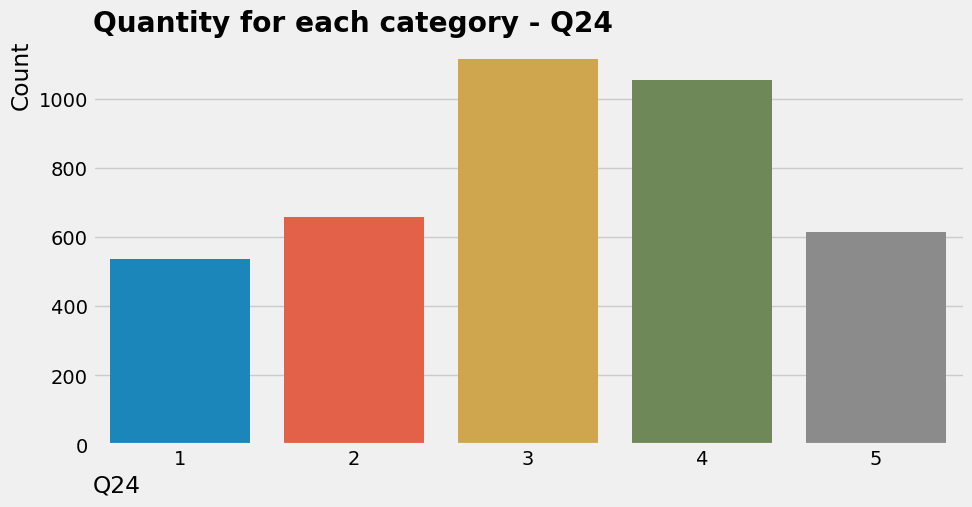

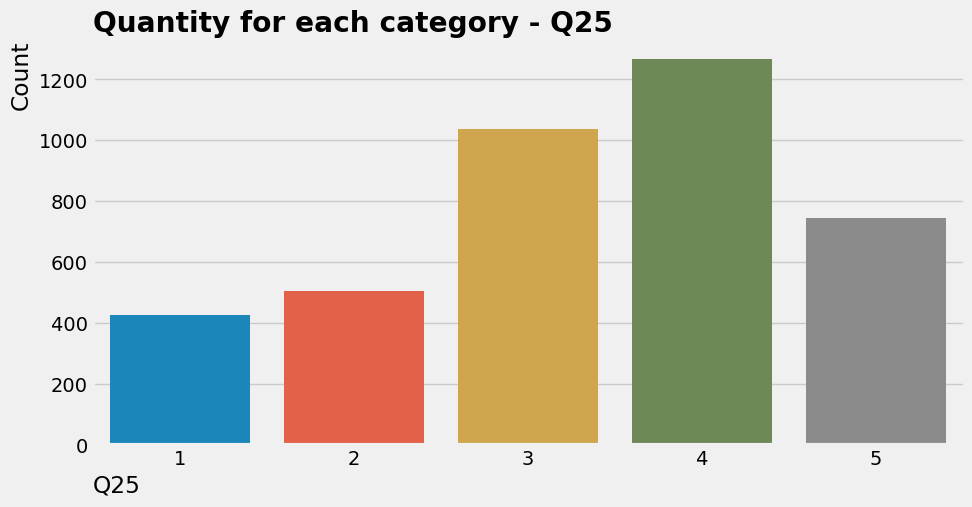

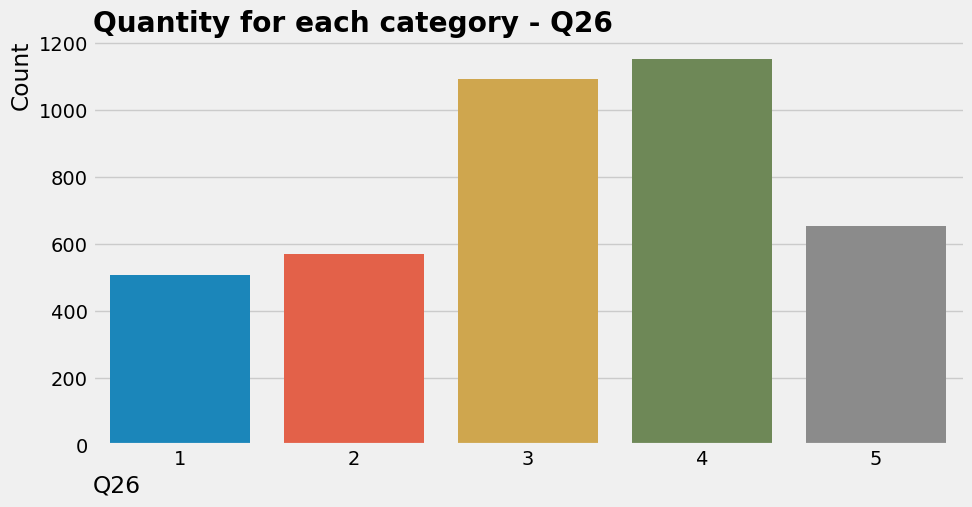

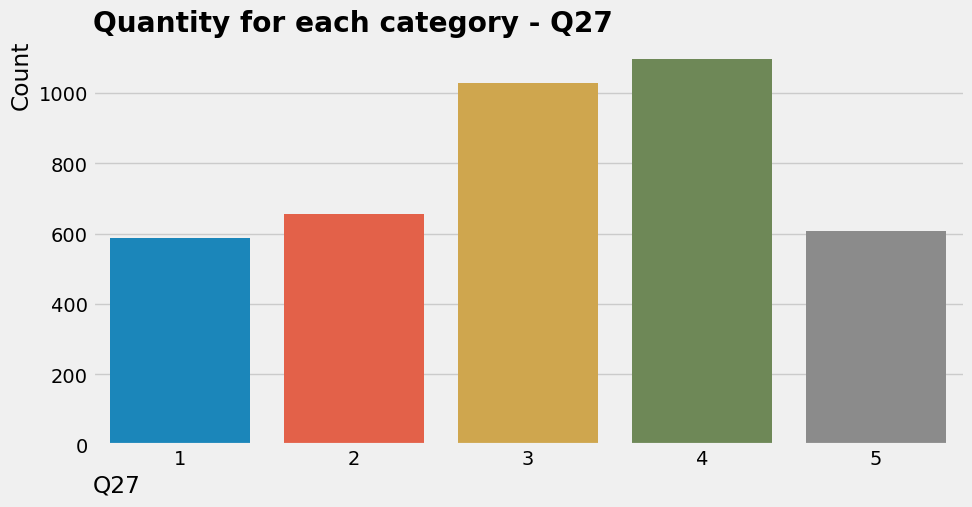

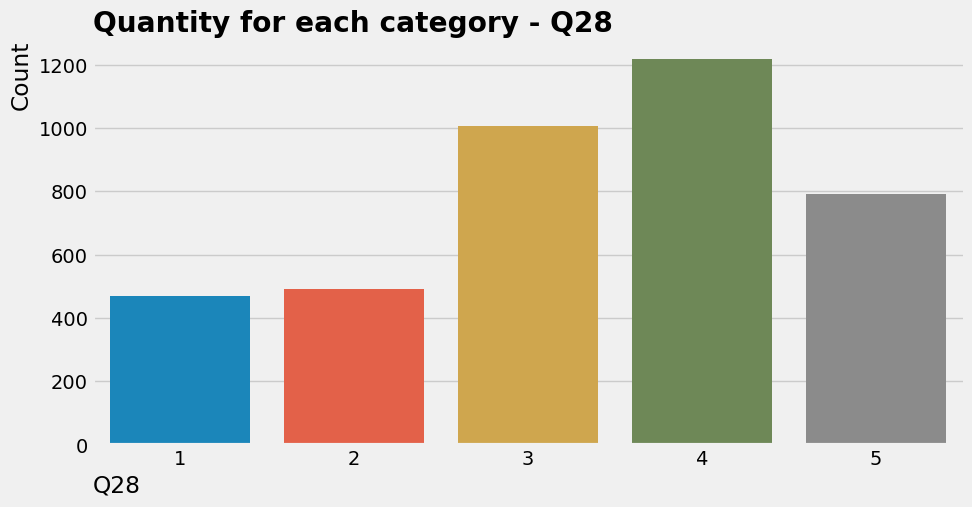

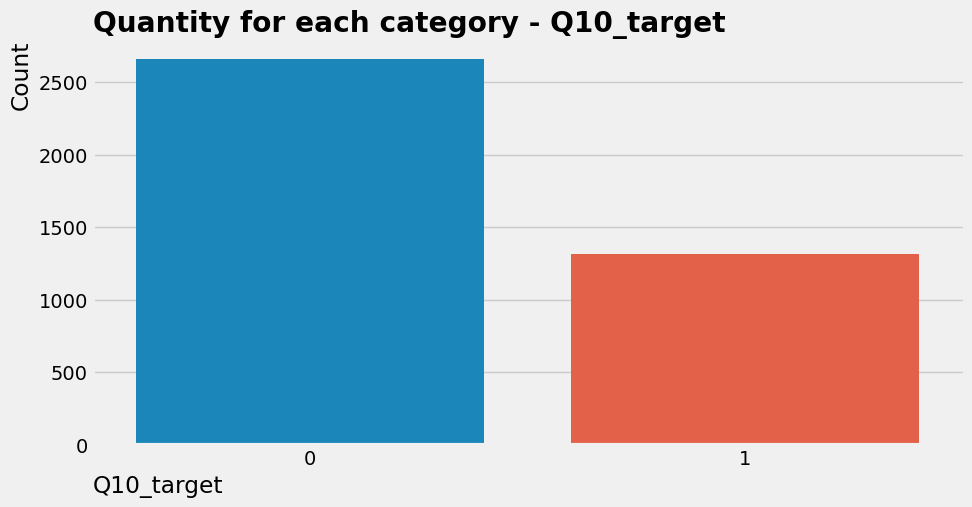

In [36]:
# Definir o tamanho do gráfico
plt.figure(figsize=(5, 3))

# Loop através das colunas categóricas
for col in df_eda_cat.columns:
    # Contar as observações por categoria
    category_counts = df_eda_cat[col].value_counts()
    
    # Criar o gráfico de barras para a variável atual
    sns.barplot(x=category_counts.index, y=category_counts.values)
    
    # Adicionar título e rótulos dos eixos
    plt.title(f'Quantity for each category - {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Mostrar o gráfico de barras para a variável atual
    plt.show()


# **6 - DATA PREPARATION**

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [37]:
# create a restore point for the previous section dataframe
df_prep = df_eda.copy()

# check dataframe
df_prep

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q10_target
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
5814,3,13,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,0
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0


## 6.2 - Remove variables that won't be available in the production environment

*Remove variables that model can use on production to make predictions*

In [38]:
# No need for this first iteration

## 6.3 - Train-Validation-Test split

## 6.5 - Encode categorical features

*Encode categorical feature to make modelling possible for ML models*

### 6.5.1 - Likert encoding with threshold

In [39]:
def likert(value):
    if value in [1,2,3]:
        return 0
    else:
        return 1

In [40]:
df_prep.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q10_target'],
      dtype='object')

In [41]:
df_temp = df_prep.loc[:, ~df_prep.columns.isin(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty','Q10_target'])].copy()
df_temp = df_temp[df_temp.columns].applymap(lambda x: likert(x))

In [42]:
df_prep[df_temp.columns] = df_temp
df_prep

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q10_target
0,1,2,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,2,1,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5814,3,13,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5816,3,13,1,3,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
5817,3,13,1,0,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


### 6.5.3 - Target Encoding

In [43]:
# No need for this first iteration

## 6.6 - Response variable transformation

*Transform target variable (e.g. log, sqrt, etc) to make modelling "easier" for ML models*

**Already done**

# **7 - FEATURE SELECTION**

## 7.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [44]:
# create a restore point for the previous section dataframe
df_f_selection = df_prep.copy()

# check dataframe
df_f_selection

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q10_target
0,1,2,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,2,1,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5814,3,13,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5816,3,13,1,3,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
5817,3,13,1,0,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


## 7.2 - Logist regression coefficients

In [45]:
columns2 = list(df_f_selection.drop(columns=['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q10', 'Q10_target']).columns)
columns2

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28']

In [46]:
x = df_f_selection[columns2]
y = df_f_selection["Q10_target"]

# **8 - ML MODEL TRAINING**

## 8.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [47]:
# create a restore point for the previous section dataframe
df_train = df_f_selection.copy()

# check dataframe
df_train

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q10_target
0,1,2,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,2,1,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5814,3,13,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5816,3,13,1,3,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
5817,3,13,1,0,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


## 8.2 - Metrics

**Metrics - Mumeric**

- Mean Absolute Error (MAE)


**Metrics - Categorical**
- Accuracy: Correct Prediction / Total  (maximize)


**Test Size**
- (Not Validation): 0.3 (30%) of all Data

## 8.3 - ML models

### 8.3.1 Logistic Regression

In [48]:
y

0       0
1       0
2       0
4       1
5       0
       ..
5813    0
5814    1
5816    0
5817    0
5818    1
Name: Q10_target, Length: 3977, dtype: category
Categories (2, int64): [0, 1]

In [49]:
#This package needs a constant defined by user
X = sm.add_constant(x)

#Model estimation - 'MNLogit' function from package
#'statsmodels.discrete.discrete_model'
model = Logit(endog=y, exog=X).fit()

#Parâmetros do modelo
model.summary()

Optimization terminated successfully.
         Current function value: 0.416990
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Q10_target   No. Observations:                 3977
Model:                          Logit   Df Residuals:                     3949
Method:                           MLE   Df Model:                           27
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                  0.3433
Time:                        23:20:33   Log-Likelihood:                -1658.4
converged:                       True   LL-Null:                       -2525.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4483      0.054      8.331      0.000       0.343       0.554
Q1            -0.1326      0.186     -0.712      0.476      -0.497       0.232
Q2            -0.6865      0.188     -3.647      0.000      -1.056      -0.318
Q3            -0.0469      0.139     -0.338      0.735      -0.319       0.225
Q4             0.0621      0.169      0.368      0.713      -0.269       0.393
Q5            -0.3633      0.182     -1.991      0.046      -0.721      -0.006
Q6            -0.2372      0.166     -1.429      0.153      -0.563       0.088
Q7            -0.6955      0.195     -3.575      0.000      -1.077      -0.314
Q8            -0.7716      0.205     -3.763      0.000      -1.173      -0.370
Q9            -0.6178      0.143     -4.325      0.000      -0.898      -0.338
Q11           -0.3537      0.147     -2.401      0.016      -0.642      -0.065
Q12           -0.5048      0.181     -2.785      0.005      -0.860      -0.150
Q13           -0.1361      0.169     -0.807      0.420      -0.467       0.195
Q14           -0.3623      0.173     -2.094      0.036      -0.701      -0.023
Q15            0.0434      0.165      0.263      0.793      -0.280       0.367
Q16           -0.6661      0.173     -3.849      0.000      -1.005      -0.327
Q17            1.0028      0.148      6.757      0.000       0.712       1.294
Q18           -0.1463      0.166     -0.881      0.378      -0.472       0.179
Q19           -0.2479      0.164     -1.516      0.130      -0.568       0.073
Q20           -0.1207      0.172     -0.701      0.484      -0.458       0.217
Q21            0.0975      0.185      0.526      0.599      -0.266       0.461
Q22           -0.0339      0.180     -0.188      0.851      -0.387       0.319
Q23           -0.3718      0.180     -2.063      0.039      -0.725      -0.019
Q24           -0.2452      0.181     -1.352      0.176      -0.601       0.110
Q25            0.3251      0.165      1.972      0.049       0.002       0.648
Q26           -0.4038      0.159     -2.534      0.011      -0.716      -0.091
Q27           -0.2565      0.160     -1.605      0.108      -0.570       0.057
Q28            0.1321      0.153      0.864      0.388      -0.168       0.432
==============================================================================
"""

In [50]:
#Confusion Matrix

# Adicionando os valores previstos de probabilidade na base de dados
df_train['phat'] = model.predict()
#Visualizando a base de dados com a variável 'phat'
df_train

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q10_target,phat
0,1,2,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.610
1,1,2,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.610
2,1,2,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.005
4,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.610
5,1,2,1,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.610
5814,3,13,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.610
5816,3,13,1,3,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.005
5817,3,13,1,0,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.005


In [51]:
# In[ ]: Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score, precision_score, f1_score

def matriz_confusao(observado,predicts,cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
    
    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)
    
    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)
    precisao = precision_score(observado, predicao_binaria, pos_label=1)
    f1 = f1_score(observado, predicao_binaria, pos_label=1)
    loglik = model.llf


    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Acuracy (EGM)':[acuracia], #Eficiência Global do Modelo
                                'Sensitivity (Recall)':[sensitividade],
                                'Especificity':[especificidadee],
                                'Precision': [precisao],
                                'F1-Score': [f1],
                                'Log Likelihood': [loglik],
                               })
    return indicadores

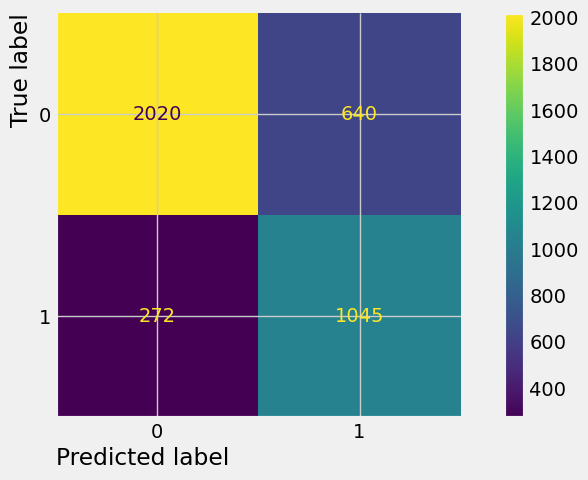

,Acuracy (EGM),Sensitivity (Recall),Especificity,Precision,F1-Score,Log Likelihood
0,0.771,0.793,0.759,0.620,0.696,"-1,658.368"


In [52]:
#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df_train['Q10_target'],
                predicts=df_train['phat'], 
                cutoff=0.5)

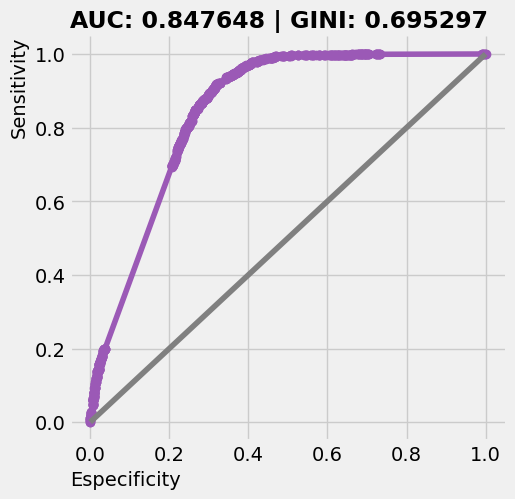

In [53]:
# In[ ]: Construção da curva ROC

from sklearn.metrics import roc_curve, auc

#Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(df_train['Q10_target'],df_train['phat'])
roc_auc = auc(fpr, tpr)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

#Plotando a curva ROC
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr, '-o', color="#9b59b6")
plt.plot(fpr,fpr, color='gray')
plt.title("AUC: %f" % roc_auc +
          " | GINI: %f" % gini, fontsize=17)
plt.xlabel("Especificity", fontsize=14)
plt.ylabel("Sensitivity", fontsize=14)
plt.show()

In [54]:
#Smal is better
AIC = model.aic
BIC = model.bic
print('AIC = ', AIC)
print('BIC = ',BIC)

AIC =  3372.735549401567
BIC =  3548.8074746673824


### 8.3.2 Logistic Regression with Stepwise

In [55]:
from stepwise_process.statsmodels import stepwise

In [56]:
df_train.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q10_target', 'phat'],
      dtype='object')

In [57]:
columns2 = list(df_train.drop(columns=['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q10', 'Q10_target', 'phat']).columns)
X = df_train[columns2]
y = df_train["Q10_target"]

In [58]:
# Null model
model = sm.MNLogit(y, sm.add_constant(np.ones(len(y))))
results = model.fit()
current_aic = results.aic

Optimization terminated successfully.
         Current function value: 0.634993
         Iterations 4


In [59]:
# Avaliable features
available_vars = list(X.columns)

In [60]:
# Lista de variáveis selecionadas
selected_vars = []

In [61]:
while len(available_vars) > 0:
    # Lista de aics para cada variável
    aics = []
    for var in available_vars:
        tmp_model = sm.MNLogit(y, sm.add_constant(X[selected_vars + [var]]))
        tmp_results = tmp_model.fit()
        aics.append(tmp_results.aic)
    
    # Seleciona variável que melhora mais o AIC
    best_var_idx = np.argmin(aics)
    best_var = available_vars[best_var_idx]
    best_aic = aics[best_var_idx]
    
    # Checa se a adição dessa variável melhora significativamente o modelo
    if best_aic < current_aic:
        # Adiciona variável selecionada
        selected_vars.append(best_var)
        available_vars.remove(best_var)
        current_aic = best_aic
    else:
        break

Optimization terminated successfully.
         Current function value: 0.535925
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503914
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.536071
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525019
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.495040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.514433
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.492753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.513950
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.519355
  

In [62]:
# Modelo final com variáveis selecionadas
stepwise_model = sm.MNLogit(y, sm.add_constant(X[selected_vars]))
stepwise_results = stepwise_model.fit()
print(stepwise_results.summary())

Optimization terminated successfully.
         Current function value: 0.417902
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:             Q10_target   No. Observations:                 3977
Model:                        MNLogit   Df Residuals:                     3961
Method:                           MLE   Df Model:                           15
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                  0.3419
Time:                        23:21:51   Log-Likelihood:                -1662.0
converged:                       True   LL-Null:                       -2525.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
Q10_target=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4451      0.053      8.354      0.000       0.341       0.550
Q7              -0.7714

In [64]:
print(df_train.shape)
print(df_train[selected_vars].shape)

(3977, 35)
(3977, 15)


In [65]:
# Split the data into X & y

X = df_train[selected_vars].values
X

y = df_train['Q10_target']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(3977, 15)
(3977,)


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(2862, 15)
(796, 15)
(319, 15)
(2862,)
(796,)
(319,)


In [68]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [69]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

array([[-0.77147232, -0.45866353, -0.75253173, -0.63482502, -0.63218279,
        -0.7382396 ,  0.90760291, -0.57569105, -0.57424446, -0.4431362 ,
        -0.48746867, -0.25975068, -0.37935244,  0.44775677, -0.33463412]])

In [70]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

In [71]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7760307477288609
The Testing Accuracy is:  0.7449748743718593
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1926
           1       0.62      0.79      0.70       936

    accuracy                           0.78      2862
   macro avg       0.75      0.78      0.76      2862
weighted avg       0.80      0.78      0.78      2862



In [73]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

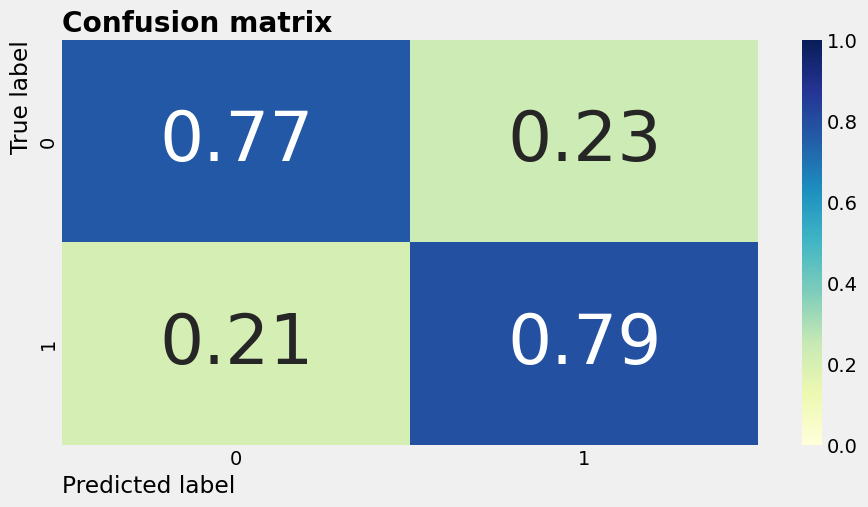

In [74]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [75]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.412367039493374
The Log Loss on Testing Dataset is:  0.4318696931714538


# **9 - HYPERPARAMETER TUNNING**

## 9.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_tune = df_train.copy()

# check dataframe
df_tune

## 9.2 - Feature selection

In [ ]:
df = df_tune.drop('phat', axis = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df.columns

In [ ]:
list = list(df.drop(columns=['instr', 'class', 'nb.repeat', 'attendance', 'difficulty','Q10', 'Q10_target']).columns)

In [ ]:
X = df[list]
y = df["Q10_target"]
print(X.shape)
print(y.shape)

In [ ]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

In [ ]:
# Feature importance
fi_col = []
fi = []
for i,column in enumerate(df.drop(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty','Q10', 'Q10_target'], axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

In [ ]:
# Criando o dataframe com as features e sua importância
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:15] # Cumulative reachs 80%

fi_df

In [ ]:
print(df.shape)
print(df[columns_to_keep].shape)

In [ ]:
# Split the data into X & y

X = df[columns_to_keep].values
X

y = df['Q10_target']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

In [ ]:
df_sel = df[columns_to_keep]
df_sel

In [ ]:
#Esse pacote precisa que a constante seja definida pelo usuário
X = sm.add_constant(df_sel)

#Estimação do modelo - função 'MNLogit' do pacote
#'statsmodels.discrete.discrete_model'
modelo3 = Logit(endog=y, exog=X).fit()

#Parâmetros do modelo
modelo3.summary()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score, precision_score, f1_score

def matriz_confusao(observado,predicts,cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
    
    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)
    
    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)
    precisao = precision_score(observado, predicao_binaria, pos_label=1)
    f1 = f1_score(observado, predicao_binaria, pos_label=1)
    loglik = modelo3.llf
    
    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Acurácia (EGM)':[acuracia], #Eficiência Global do Modelo
                                'Sensitividade (Recall)':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Precisão': [precisao],
                                'F1-Score': [f1],
                                'Log Likelihood': [loglik],
                                
                               })
    return indicadores

In [ ]:
#Construção de uma matriz de confusão

# Adicionando os valores previstos de probabilidade na base de dados
df['phat'] = modelo3.predict()
#Visualizando a base de dados com a variável 'phat'
df

In [ ]:
#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df['Q10_target'],
                predicts=df['phat'], 
                cutoff=0.5)

In [ ]:
# In[ ]: Construção da curva ROC

from sklearn.metrics import roc_curve, auc

#Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(df['Q10_target'],df['phat'])
roc_auc = auc(fpr, tpr)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

#Plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color="#9b59b6")
plt.plot(fpr,fpr, color='gray')
plt.title("Área abaixo da curva: %f" % roc_auc +
          " | Coeficiente de GINI: %f" % gini, fontsize=17)
plt.xlabel("Especificidade", fontsize=14)
plt.ylabel("Sensitividade", fontsize=14)
plt.show()

## 9.2 - Hypertune the best ML model

*Check the best hyperparams for the best ML model*

### 9.2.1 - Grid Search

In [ ]:
np.geomspace(1e-5, 1e5, num=20)

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [ ]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

In [ ]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

In [ ]:
# Maybe we have a different metric we want to track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()

In [ ]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

In [ ]:
n_samples = len(y)
loglik = -log_loss2 * n_samples
loglik

In [ ]:
# Final Model 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=0.5455594781168515)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

In [ ]:
n_samples = len(y)
loglik = -log_loss2 * n_samples
loglik

## 9.3 - Define best hyperparameters

*Explicitly define best hyper parameters*

In [ ]:
# TO-DO

# **10 - PERFORMANCE EVALUATION AND INTERPRETATION**

## 10.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_perform = df_tune.copy()

# check dataframe
df_perform

## 10.2 - Training Performance

*Get final model performance on training data*

In [ ]:
# TO-DO

## 10.3 - Generalization performance

### 10.3.1 - Final model training

*Get final model performance on validation data*

In [ ]:
# TO-DO

### 10.3.2 - Error analysis

*Perform error analysis on final model to make sure it is ready for production*

In [ ]:
# TO-DO

## 10.4 - Define prodution model

*Train ML on "training + validation" data*

In [ ]:
# TO-DO

## 10.5 - Testing performance

*Get production model performance on testing data*

In [ ]:
# TO-DO

## 10.6 - Business performance

*Translate testing performance into business results*

In [ ]:
# TO-DO

# **11 - DEPLOYMENT**

![Deployment architecture](../img/....jpg)

## 11.1 - API creation

*Code to create API for ML predictions*

In [ ]:
# TO-DO

## 11.2 - Docker container

*Code to create a Docker container and deploy ML model*

In [ ]:
# TO-DO